# Data Science and Business Analytics <br><br>TASK 1: Prediction using Supervised ML



### BY: Fathima Fahma

### To predict the percentage of an student based on number of study hours

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#### Importing the data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
corr=df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Visualising the data

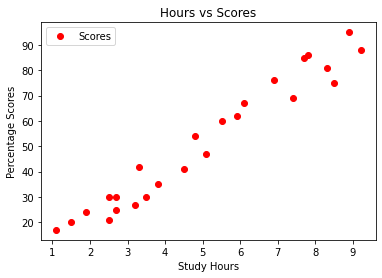

In [14]:
df.plot(x='Hours',y='Scores',style='o',c='red')
plt.title('Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.show()

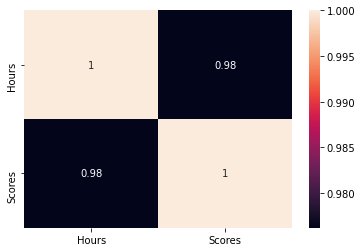

In [15]:
sns.heatmap(corr,annot=True)

#### Data Preprocessing 
Divide the data into attributes(input) and labels(output).

In [16]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

Split the data into train set and test set 

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape

(20, 1)

#### Build Linear Regression Model
Build the model and train the data

In [23]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [26]:
print(reg.coef_)

[9.91065648]


In [27]:
print(reg.intercept_)

2.018160041434683


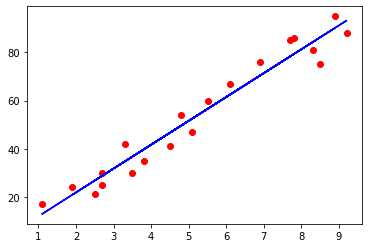

In [31]:
reg_line = reg.coef_*x_train + reg.intercept_
plt.scatter(x_train, y_train, c='red')
plt.plot(x_train,reg_line, c='blue')
plt.show()

#### Predicting Scores

In [32]:
y_predict = reg.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual scores with predicted scores

In [33]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predicting scores for 9.25 study hours

In [34]:
hours=9.25
pred = reg.predict([[hours]])
print('Study hours = ',hours)
print('Predicted score = ',pred[0])

Study hours =  9.25
Predicted score =  93.69173248737538


#### Evaluating the model

In [38]:
print('Mean Squared Error = ',metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Squared Error =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665


###### TASK Completed